In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Healthcare Providers.csv")

In [3]:
print("First 10 rows of the dataset:")
df.head(10)

First 10 rows of the dataset:


,index,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,...,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,1891106191,UPADHYAYULA,SATYASREE,NaN,M.D.,F,I,1402 S GRAND BLVD,FDT 14TH FLOOR,...,99223,"Initial hospital inpatient care, typically 70 ...",N,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889
1,3354385,1346202256,JONES,WENDY,P,M.D.,F,I,2950 VILLAGE DR,NaN,...,G0202,"Screening mammography, bilateral (2-view study...",N,175,175,175,123.73,548.8,118.83,135.31525714
2,3001884,1306820956,DUROCHER,RICHARD,W,DPM,M,I,20 WASHINGTON AVE,STE 212,...,99348,"Established patient home visit, typically 25 m...",N,32,13,32,90.65,155,64.4396875,60.5959375
3,7594822,1770523540,FULLARD,JASPER,NaN,MD,M,I,5746 N BROADWAY ST,NaN,...,81002,"Urinalysis, manual test",N,20,18,20,3.5,5,3.43,3.43
4,746159,1073627758,PERROTTI,ANTHONY,E,DO,M,I,875 MILITARY TRL,SUITE 200,...,96372,Injection beneath the skin or into muscle for ...,N,33,24,31,26.52,40,19.539393939,19.057575758
5,3443985,1346571551,PUGH,JOHN,R,DPT,M,I,504 ALBEMARLE SQ,NaN,...,97016,Application of blood vessel compression or dec...,N,192,36,192,13.550989583,63.1125,9.6764583333,10.506927083
6,2137027,1215943535,BRUMITT,TOM,B,DO,M,I,70 DOCTORS PARK,NaN,...,20610,Aspiration and/or injection of large joint or ...,N,21,19,21,45.971904762,164.57142857,36.036190476,37.77952381
7,6169160,1629160551,GALBREATH,RONALD,G,M.D.,M,I,12522 E. LAMBERT ROAD,SUITE D,...,G0008,Administration of influenza virus vaccine,N,52,50,52,29.33,50,28.74,25.32
8,5086226,1518929124,BOONE,RALPH,M,D.O.,M,I,1215 DUNN AVE,NaN,...,80061,"Blood test, lipids (cholesterol and triglyceri...",N,73,68,73,15.510410959,76,15.197945205,15.197945205
9,3900718,1396781134,METWEST INC,NaN,NaN,NaN,NaN,O,695 S BROADWAY,NaN,...,84392,Urine sulfate (acid) level,N,19,16,19,6.51,29.65,6.38,6.38


In [4]:
print("Shape of the Dataset:")
df.shape

Shape of the Dataset:


(100000, 27)

In [5]:
print("\nDataset information")
df.info()


Dataset information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   index                                                     100000 non-null  int64  
 1   National Provider Identifier                              100000 non-null  int64  
 2   Last Name/Organization Name of the Provider               100000 non-null  object 
 3   First Name of the Provider                                95745 non-null   object 
 4   Middle Initial of the Provider                            70669 non-null   object 
 5   Credentials of the Provider                               92791 non-null   object 
 6   Gender of the Provider                                    95746 non-null   object 
 7   Entity Type of the Provider                               100000 non-nul

In [7]:
print("\nStatistical summary of the dataset:")
print(df.describe(include='all'))


Statistical summary of the dataset:
               index  National Provider Identifier  \
count   1.000000e+05                  1.000000e+05   
unique           NaN                           NaN   
top              NaN                           NaN   
freq             NaN                           NaN   
mean    4.907646e+06                  1.498227e+09   
std     2.839633e+06                  2.874125e+08   
min     2.090000e+02                  1.003001e+09   
25%     2.458791e+06                  1.245669e+09   
50%     4.901266e+06                  1.497847e+09   
75%     7.349450e+06                  1.740374e+09   
max     9.847440e+06                  1.993000e+09   

       Last Name/Organization Name of the Provider First Name of the Provider  \
count                                       100000                      95745   
unique                                       42820                      13022   
top                                          PATEL                    M

In [8]:
print("\nMissing values and their percentages:")
missing_values = df.isnull().sum()
missing_percentages = (missing_values / len(df)) * 100
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentages
})
print(missing_data)


Missing values and their percentages:
                                                    Missing Values  Percentage
index                                                            0       0.000
National Provider Identifier                                     0       0.000
Last Name/Organization Name of the Provider                      0       0.000
First Name of the Provider                                    4255       4.255
Middle Initial of the Provider                               29331      29.331
Credentials of the Provider                                   7209       7.209
Gender of the Provider                                        4254       4.254
Entity Type of the Provider                                      0       0.000
Street Address 1 of the Provider                                 0       0.000
Street Address 2 of the Provider                             59363      59.363
City of the Provider                                             0       0.000
Zip Code of t

In [9]:
cleaned_df = df.dropna(thresh=len(df) * 0.5, axis=1)
print("Shape after removing columns with more than 50% missing values:")
print(cleaned_df.shape)

Shape after removing columns with more than 50% missing values:
(100000, 26)


In [11]:
numerical_columns = cleaned_df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical Columns:")
print(numerical_columns)

categorical_columns = cleaned_df.select_dtypes(include=['object']).columns
print("\nCategorical Columns:")
print(categorical_columns)

Numerical Columns:
Index(['index', 'National Provider Identifier', 'Zip Code of the Provider'], dtype='object')

Categorical Columns:
Index(['Last Name/Organization Name of the Provider',
       'First Name of the Provider', 'Middle Initial of the Provider',
       'Credentials of the Provider', 'Gender of the Provider',
       'Entity Type of the Provider', 'Street Address 1 of the Provider',
       'City of the Provider', 'State Code of the Provider',
       'Country Code of the Provider', 'Provider Type',
       'Medicare Participation Indicator', 'Place of Service', 'HCPCS Code',
       'HCPCS Description', 'HCPCS Drug Indicator', 'Number of Services',
       'Number of Medicare Beneficiaries',
       'Number of Distinct Medicare Beneficiary/Per Day Services',
       'Average Medicare Allowed Amount', 'Average Submitted Charge Amount',
       'Average Medicare Payment Amount',
       'Average Medicare Standardized Amount'],
      dtype='object')


In [12]:
# List of categorical columns to fill with mode
categorical_columns = [
    'First Name of the Provider',
    'Middle Initial of the Provider',
    'Credentials of the Provider',
    'Gender of the Provider'
]

# Fill missing values for each column
for column in categorical_columns:
    cleaned_df[column].fillna(cleaned_df[column].mode()[0], inplace=True)

In [13]:
print("\nMissing values after imputation:")
print(cleaned_df.isnull().sum())



Missing values after imputation:
index                                                       0
National Provider Identifier                                0
Last Name/Organization Name of the Provider                 0
First Name of the Provider                                  0
Middle Initial of the Provider                              0
Credentials of the Provider                                 0
Gender of the Provider                                      0
Entity Type of the Provider                                 0
Street Address 1 of the Provider                            0
City of the Provider                                        0
Zip Code of the Provider                                    0
State Code of the Provider                                  0
Country Code of the Provider                                0
Provider Type                                               0
Medicare Participation Indicator                            0
Place of Service                    

In [15]:
DropCols = ['index', 'National Provider Identifier',
            'Last Name/Organization Name of the Provider',
            'First Name of the Provider', 'Middle Initial of the Provider',
            'Street Address 1 of the Provider', 'Zip Code of the Provider', 
            "HCPCS Code"]
cleaned_df = cleaned_df.drop(columns=DropCols)



In [16]:
cleaned_df.head()

,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,City of the Provider,State Code of the Provider,Country Code of the Provider,Provider Type,Medicare Participation Indicator,Place of Service,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,M.D.,F,I,SAINT LOUIS,MO,US,Internal Medicine,Y,F,"Initial hospital inpatient care, typically 70 ...",N,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889
1,M.D.,F,I,FAYETTEVILLE,NC,US,Obstetrics & Gynecology,Y,O,"Screening mammography, bilateral (2-view study...",N,175,175,175,123.73,548.8,118.83,135.31525714
2,DPM,M,I,NORTH HAVEN,CT,US,Podiatry,Y,O,"Established patient home visit, typically 25 m...",N,32,13,32,90.65,155,64.4396875,60.5959375
3,MD,M,I,KANSAS CITY,MO,US,Internal Medicine,Y,O,"Urinalysis, manual test",N,20,18,20,3.5,5,3.43,3.43
4,DO,M,I,JUPITER,FL,US,Internal Medicine,Y,O,Injection beneath the skin or into muscle for ...,N,33,24,31,26.52,40,19.539393939,19.057575758


In [17]:
# List of columns to convert
columns_to_convert = [
    'Number of Services',
    'Number of Medicare Beneficiaries',
    'Number of Distinct Medicare Beneficiary/Per Day Services',
    'Average Medicare Allowed Amount',
    'Average Submitted Charge Amount',
    'Average Medicare Payment Amount',
    'Average Medicare Standardized Amount'
]

# Convert columns to numeric, setting invalid parsing to NaN
for column in columns_to_convert:
    cleaned_df[column] = pd.to_numeric(cleaned_df[column], errors='coerce')

# Display info to verify the changes
print(cleaned_df[columns_to_convert].info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Number of Services                                        97347 non-null  float64
 1   Number of Medicare Beneficiaries                          99595 non-null  float64
 2   Number of Distinct Medicare Beneficiary/Per Day Services  98500 non-null  float64
 3   Average Medicare Allowed Amount                           99255 non-null  float64
 4   Average Submitted Charge Amount                           93277 non-null  float64
 5   Average Medicare Payment Amount                           99534 non-null  float64
 6   Average Medicare Standardized Amount                      99530 non-null  float64
dtypes: float64(7)
memory usage: 5.3 MB
None


In [18]:
 cleaned_df

,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,City of the Provider,State Code of the Provider,Country Code of the Provider,Provider Type,Medicare Participation Indicator,Place of Service,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,M.D.,F,I,SAINT LOUIS,MO,US,Internal Medicine,Y,F,"Initial hospital inpatient care, typically 70 ...",N,27.0,24.0,27.0,200.587778,305.211111,157.262222,160.908889
1,M.D.,F,I,FAYETTEVILLE,NC,US,Obstetrics & Gynecology,Y,O,"Screening mammography, bilateral (2-view study...",N,175.0,175.0,175.0,123.730000,548.800000,118.830000,135.315257
2,DPM,M,I,NORTH HAVEN,CT,US,Podiatry,Y,O,"Established patient home visit, typically 25 m...",N,32.0,13.0,32.0,90.650000,155.000000,64.439688,60.595937
3,MD,M,I,KANSAS CITY,MO,US,Internal Medicine,Y,O,"Urinalysis, manual test",N,20.0,18.0,20.0,3.500000,5.000000,3.430000,3.430000
4,DO,M,I,JUPITER,FL,US,Internal Medicine,Y,O,Injection beneath the skin or into muscle for ...,N,33.0,24.0,31.0,26.520000,40.000000,19.539394,19.057576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,PT,F,I,WILMINGTON,IL,US,Physical Therapist in Private Practice,Y,O,"Evaluation of physical therapy, typically 30 m...",N,20.0,20.0,20.0,85.372500,214.000000,60.725500,62.248500
99996,ARNP,F,I,REDMOND,OR,US,Nurse Practitioner,Y,O,Established patient office or other outpatient...,N,136.0,107.0,136.0,61.270000,144.051471,30.006176,37.040221
99997,M.D.,M,I,SAINT LOUIS,MO,US,Cardiology,Y,F,"Doppler ultrasound study of heart blood flow, ...",N,11.0,11.0,11.0,17.980000,109.545455,14.090000,14.620000
99998,MD,F,I,LARCHMONT,NY,US,Internal Medicine,Y,O,Administration of influenza virus vaccine,N,12.0,12.0,12.0,30.540000,65.000000,29.930000,25.320000


In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler,StandardScaler,OneHotEncoder
from sklearn.pipeline import make_pipeline

In [20]:
import pandas as pd

# Assuming 'cleaned_df' is your DataFrame and 'target_column' is your target variable
nominal_columns = ['Credentials of the Provider','Gender of the Provider','Entity Type of the Provider','City of the Provider','State Code of the Provider',
           'Country Code of the Provider','Provider Type','Medicare Participation Indicator','Place of Service','HCPCS Description','HCPCS Drug Indicator']  # Replace with actual nominal columns

# Check unique values in each nominal column
for col in nominal_columns:
    unique_count = cleaned_df[col].nunique()
    print(f"Column '{col}' has {unique_count} unique values.")
    
    if unique_count > 10:
        print(f"Applying frequency encoding to column: {col}")
        # Apply Frequency Encoding
        freq_map = cleaned_df[col].value_counts().to_dict()
        cleaned_df[col] = cleaned_df[col].map(freq_map)
    else:
        print(f"Applying one-hot encoding to column: {col}")
        # Apply One-Hot Encoding for low-cardinality columns
        one_hot = pd.get_dummies(cleaned_df[col], prefix=col)
        cleaned_df = pd.concat([cleaned_df, one_hot], axis=1)
        cleaned_df.drop(columns=[col], inplace=True)

# Display the updated DataFrame
print(cleaned_df.info())


Column 'Credentials of the Provider' has 1854 unique values.
Applying frequency encoding to column: Credentials of the Provider
Column 'Gender of the Provider' has 2 unique values.
Applying one-hot encoding to column: Gender of the Provider
Column 'Entity Type of the Provider' has 2 unique values.
Applying one-hot encoding to column: Entity Type of the Provider
Column 'City of the Provider' has 5846 unique values.
Applying frequency encoding to column: City of the Provider
Column 'State Code of the Provider' has 58 unique values.
Applying frequency encoding to column: State Code of the Provider
Column 'Country Code of the Provider' has 4 unique values.
Applying one-hot encoding to column: Country Code of the Provider
Column 'Provider Type' has 90 unique values.
Applying frequency encoding to column: Provider Type
Column 'Medicare Participation Indicator' has 2 unique values.
Applying one-hot encoding to column: Medicare Participation Indicator
Column 'Place of Service' has 2 unique val

In [21]:
# Convert all boolean columns to integers
boolean_columns = cleaned_df.select_dtypes(include=['bool']).columns
cleaned_df[boolean_columns] = cleaned_df[boolean_columns].astype(float)


In [22]:
cleaned_df

,Credentials of the Provider,City of the Provider,State Code of the Provider,Provider Type,HCPCS Description,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,...,Country Code of the Provider_DE,Country Code of the Provider_JP,Country Code of the Provider_TR,Country Code of the Provider_US,Medicare Participation Indicator_N,Medicare Participation Indicator_Y,Place of Service_F,Place of Service_O,HCPCS Drug Indicator_N,HCPCS Drug Indicator_Y
0,32757,500,1997,11366,1297,27.0,24.0,27.0,200.587778,305.211111,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
1,32757,209,3725,1028,243,175.0,175.0,175.0,123.730000,548.800000,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
2,1330,10,1403,2027,44,32.0,13.0,32.0,90.650000,155.000000,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
3,40083,317,1997,11366,460,20.0,18.0,20.0,3.500000,5.000000,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
4,2478,51,7263,11366,732,33.0,24.0,31.0,26.520000,40.000000,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,800,323,4073,2780,330,20.0,20.0,20.0,85.372500,214.000000,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
99996,463,14,1046,5713,4578,136.0,107.0,136.0,61.270000,144.051471,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
99997,32757,500,1997,4602,75,11.0,11.0,11.0,17.980000,109.545455,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
99998,40083,6,6361,11366,1444,12.0,12.0,12.0,30.540000,65.000000,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0


In [23]:
cleaned_df.fillna(cleaned_df.mean(), inplace=True)

In [24]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 26 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   Credentials of the Provider                               100000 non-null  int64  
 1   City of the Provider                                      100000 non-null  int64  
 2   State Code of the Provider                                100000 non-null  int64  
 3   Provider Type                                             100000 non-null  int64  
 4   HCPCS Description                                         100000 non-null  int64  
 5   Number of Services                                        100000 non-null  float64
 6   Number of Medicare Beneficiaries                          100000 non-null  float64
 7   Number of Distinct Medicare Beneficiary/Per Day Services  100000 non-null  float64
 8   Avera

In [25]:
min_max_f=['Number of Services','Number of Medicare Beneficiaries','Number of Distinct Medicare Beneficiary/Per Day Services']
Standard_f=['Average Medicare Allowed Amount','Average Submitted Charge Amount','Average Medicare Payment Amount','Average Medicare Standardized Amount']


In [26]:
min_max_transform=make_pipeline(MinMaxScaler())
Standard_transform=make_pipeline(StandardScaler())

In [27]:
preprocessor=ColumnTransformer(transformers=[
    ('min max',min_max_transform,min_max_f),
    ('standard',Standard_transform,Standard_f)
],remainder='passthrough',verbose_feature_names_out=False,force_int_remainder_cols=False)

In [28]:
preprocessor.set_output(transform='pandas')

ColumnTransformer(force_int_remainder_cols=False, remainder='passthrough',
                  transformers=[('min max',
                                 Pipeline(steps=[('minmaxscaler',
                                                  MinMaxScaler())]),
                                 ['Number of Services',
                                  'Number of Medicare Beneficiaries',
                                  'Number of Distinct Medicare Beneficiary/Per '
                                  'Day Services']),
                                ('standard',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 ['Average Medicare Allowed Amount',
                                  'Average Submitted Charge Amount',
                                  'Average Medicare Payment Amount',
                                  'Average Medicare Standardized Amount'])],
                  verbose_feature_names_out=False)

In [29]:
transformed_df=preprocessor.fit_transform(cleaned_df)

In [30]:
transformed_df

,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount,Credentials of the Provider,City of the Provider,State Code of the Provider,...,Country Code of the Provider_DE,Country Code of the Provider_JP,Country Code of the Provider_TR,Country Code of the Provider_US,Medicare Participation Indicator_N,Medicare Participation Indicator_Y,Place of Service_F,Place of Service_O,HCPCS Drug Indicator_N,HCPCS Drug Indicator_Y
0,0.016194,0.013158,0.016194,1.098226,0.621012,0.972452,1.003321,32757,500,1997,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
1,0.165992,0.165992,0.165992,0.352134,1.940981,0.549955,0.722789,32757,209,3725,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
2,0.021255,0.002024,0.021255,0.031012,-0.192958,-0.047975,-0.096209,1330,10,1403,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
3,0.009109,0.007085,0.009109,-0.814992,-1.005784,-0.718674,-0.722804,40083,317,1997,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
4,0.022267,0.013158,0.020243,-0.591527,-0.816125,-0.541578,-0.551510,2478,51,7263,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.009109,0.009109,0.009109,-0.020219,0.126753,-0.088807,-0.078095,800,323,4073,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
99996,0.126518,0.097166,0.126518,-0.254193,-0.252286,-0.426514,-0.354403,463,14,1046,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
99997,0.000000,0.000000,0.000000,-0.674428,-0.439269,-0.601485,-0.600151,32757,500,1997,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
99998,0.001012,0.001012,0.001012,-0.552503,-0.680654,-0.427351,-0.482868,40083,6,6361,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0


## Building AutoEncoder

In [32]:
# Define the selected columns for anomaly detection
selected_columns = [
    'Number of Services',
    'Number of Medicare Beneficiaries',
    'Number of Distinct Medicare Beneficiary/Per Day Services',
    'Average Medicare Allowed Amount',
    'Average Submitted Charge Amount',
    'Average Medicare Payment Amount',
    'Average Medicare Standardized Amount'
]

# Subset the transformed DataFrame with selected columns
df = transformed_df[selected_columns]

In [33]:
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt

In [34]:
x_train, x_val = train_test_split(df, test_size=0.2, random_state=42)

In [35]:
input_dim = x_train.shape[1]

In [36]:
# Input layer
input_layer = Input(shape=(input_dim,))

# Encoder with Dropout
encoded = Dense(16, activation='relu')(input_layer)  # Encoder Layer 1
encoded = Dropout(0.2)(encoded)                     # Dropout after Encoder Layer 1
encoded = Dense(8, activation='relu')(encoded)      # Encoder Layer 2
encoded = Dropout(0.2)(encoded)                     # Dropout after Encoder Layer 2

# Bottleneck layer
bottleneck = Dense(4, activation='relu')(encoded)

# Decoder with Dropout
decoded = Dense(8, activation='relu')(bottleneck)   # Decoder Layer 1
decoded = Dropout(0.2)(decoded)                     # Dropout after Decoder Layer 1
decoded = Dense(16, activation='relu')(decoded)     # Decoder Layer 2
decoded = Dropout(0.2)(decoded)                     # Dropout after Decoder Layer 2

# Output layer
output_layer = Dense(input_dim, activation='linear')(decoded)


In [37]:
# Build the model
autoencoder = Model(inputs=input_layer, outputs=output_layer)
autoencoder.compile(optimizer='adam', loss='mse')


In [38]:
# Summary of the model
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 7)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 16)                  │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 8)                   │              40 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 16)                  │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 7)                   │             119 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 603 (2.36 KB)

 Trainable params: 603 (2.36 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
# Early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=5,          # Stop training after 5 epochs without improvement
    restore_best_weights=True  # Restore model weights from the best epoch
)

In [40]:
# Train the autoencoder
history = autoencoder.fit(
    x_train, x_train,  # Input and target are the same
    epochs=100,        # Set higher epochs; early stopping will stop when needed
    batch_size=256,
    validation_data=(x_val, x_val),
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.4671 - val_loss: 0.1927
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2462 - val_loss: 0.1564
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1899 - val_loss: 0.1409
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1619 - val_loss: 0.1268
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1581 - val_loss: 0.1375
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1504 - val_loss: 0.1320
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1370 - val_loss: 0.1242
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1374 - val_loss: 0.1379
Epoch 9/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1368 - val_loss: 0.1268
Epoch 10/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1306 - val_loss: 0.1519
Epoch 11/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1274 - val_loss: 0.1351
Epoch 12/100
313/313 ━━━━━━━━━━━━━━━━━━━━

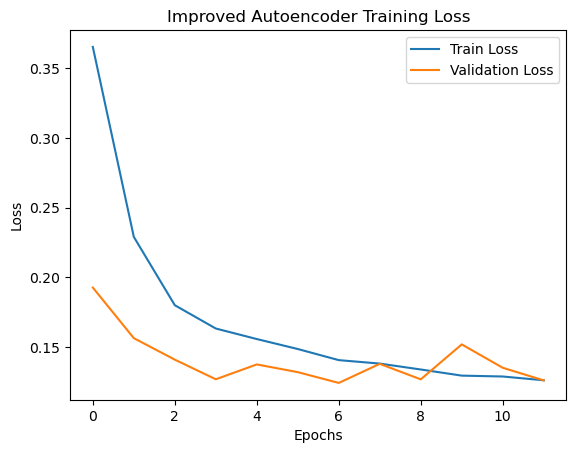

In [41]:
# Step 6: Plot Training and Validation Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Improved Autoencoder Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [42]:
reconstrcuted=autoencoder.predict(df)
reconstruction_error=np.mean(np.square(df - reconstrcuted),axis=1)

3125/3125 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


In [43]:
# Adding reconstruction error to the DataFrame
df['reconstruction_error'] = reconstruction_error

In [44]:
threshold = np.percentile(reconstruction_error, 95)
print(f"Anomaly Threshold (95th percentile): {threshold:.4f}")

Anomaly Threshold (95th percentile): 0.3677


In [45]:
# Identify anomalies based on reconstruction error
anomalies = reconstruction_error > threshold
print(f"Number of anomalies detected: {np.sum(anomalies)}")

# add anomaly labels to the DataFrame
df['anomaly'] = anomalies


Number of anomalies detected: 5000


In [46]:
df.sample(20)

,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount,reconstruction_error,anomaly
67881,0.273279,0.237854,0.248988,-0.767522,-8.161247e-01,-6.842182e-01,-0.686238,0.041168,False
42414,0.013158,0.007085,0.013158,-0.452904,-6.969102e-01,-4.446932e-01,-0.420308,0.014085,False
59855,0.038462,0.038462,0.038462,-0.601816,-6.806537e-01,-4.820980e-01,-0.485060,0.012628,False
76377,0.006073,0.000000,0.006073,-0.163234,-4.584813e-01,-1.475713e-01,-0.125101,0.018498,False
62437,0.019231,0.019231,0.019231,0.000000,1.540127e-16,-1.562244e-16,0.000000,0.024730,False
70275,0.003036,0.003036,0.003036,-0.763737,-8.107058e-01,-6.861497e-01,-0.691698,0.034610,False
93515,0.045547,0.044534,0.045547,0.286572,1.695683e+00,2.518042e-01,0.255666,0.038748,False
37906,0.000000,0.000000,0.000000,-0.694081,-8.399676e-01,-6.275196e-01,-0.622571,0.028799,False
65482,0.884615,0.141700,0.884615,0.012851,-4.920842e-01,-2.090370e-02,-0.049756,0.203045,False
85152,0.009109,0.009109,0.009109,0.440617,3.326693e-01,3.885893e-01,0.433142,0.029729,False


In [47]:
# Filter anomalies
df_a = df[df['anomaly'] == True]

print("\nTop anomalies based on reconstruction error:")
print(df_a.sort_values(by='reconstruction_error', ascending=False).head())


Top anomalies based on reconstruction error:
       Number of Services  Number of Medicare Beneficiaries  \
83456            0.001012                          0.001012   
76547            0.005061                          0.005061   
23791            0.018219                          0.018219   
16749            0.001012                          0.001012   
17876            0.001012                          0.001012   

       Number of Distinct Medicare Beneficiary/Per Day Services  \
83456                                           0.001012          
76547                                           0.005061          
23791                                           0.018219          
16749                                           0.001012          
17876                                           0.001012          

       Average Medicare Allowed Amount  Average Submitted Charge Amount  \
83456                              0.0                     1.540127e-16   
76547                 

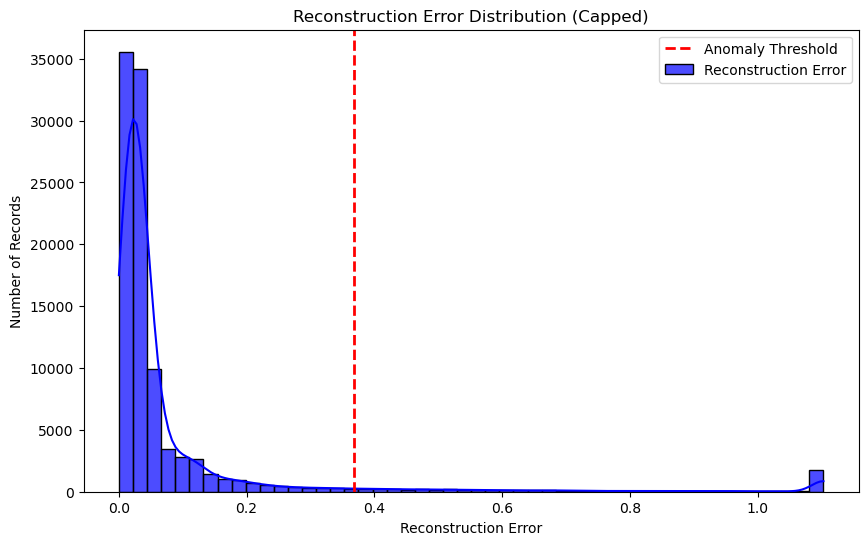

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Improved Plot for Reconstruction Error Distribution
plt.figure(figsize=(10, 6))

# Cap reconstruction errors for visualization
capped_errors = np.clip(reconstruction_error, a_min=None, a_max=threshold * 3)

# Plot Histogram with Capped Values
sns.histplot(capped_errors, bins=50, kde=True, color='blue', alpha=0.7, label='Reconstruction Error')
plt.axvline(threshold, color='red', linestyle='dashed', linewidth=2, label='Anomaly Threshold')

# Customize plot
plt.title("Reconstruction Error Distribution (Capped)")
plt.xlabel("Reconstruction Error")
plt.ylabel("Number of Records")
plt.legend()
plt.show()


In [50]:
df_a

,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount,reconstruction_error,anomaly
22,0.264170,0.243927,0.264170,-0.077296,3.098270e+00,-0.094506,-0.092497,0.456268,True
38,0.018219,0.018219,0.018219,-0.053677,2.891856e+00,-0.096714,-0.077818,0.367785,True
54,0.013158,0.013158,0.013158,0.504638,4.191109e+00,0.286358,0.159003,0.719224,True
72,0.031377,0.029352,0.031377,5.625992,1.540127e-16,4.937820,4.884511,1.985046,True
116,0.000000,0.000000,0.000000,3.619852,1.540127e-16,3.067834,3.174347,0.878933,True
...,...,...,...,...,...,...,...,...,...
99933,0.011134,0.011134,0.011134,3.651207,1.540127e-16,3.239030,3.477299,0.957393,True
99946,0.013158,0.009109,0.013158,1.057671,3.779503e+00,0.936480,0.896354,0.407386,True
99968,0.024291,0.024291,0.024291,1.753056,4.006642e+00,1.518724,1.659593,0.514966,True
99976,0.031377,0.031377,0.031377,3.656408,1.482090e+00,2.996311,3.431673,1.031920,True


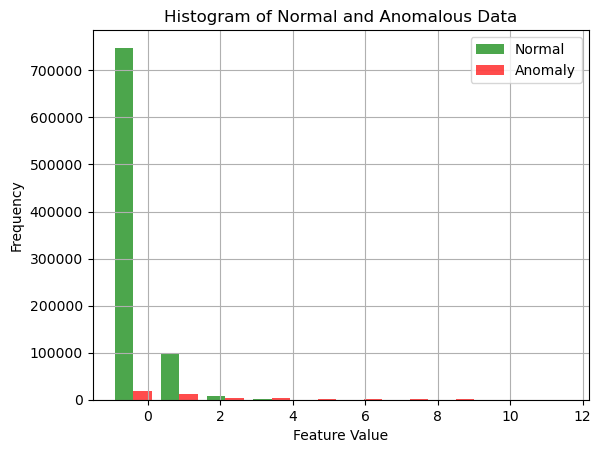

In [51]:
 #Create histograms for normal and anomaly data
plt.hist([df[df['anomaly'] == False].values.flatten(),df[df['anomaly'] == True].values.flatten()],
         bins=10, color=['green', 'red'], alpha=0.7, label=['Normal', 'Anomaly'])

# Customize the plot
plt.xlabel('Feature Value')
plt.ylabel('Frequency')
plt.title('Histogram of Normal and Anomalous Data')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()